In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hazm import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data_df = pd.read_csv("cleaned_daily_all.csv")

data_df = data_df.reset_index()
data_df.dropna(axis = 0, inplace = True)
data_df.rename(columns = {'Unnamed: 0':'Order'}, inplace = True)
data_df.replace({-np.inf: -1000000, np.inf: 1000000}, inplace = True)

data_df

,index,Order,date,max_price,min_price,close_price,last_price,first_price,yesterday_price,value,...,NonIndividual_buy_value,Individual_sell_value,NonIndividual_sell_value,adj_max_price,adj_min_price,adj_first_price,adj_last_price,adj_volume,adj_close_price,stock_name
193189,193189,966,2008-11-26,5611.0,5474.0,5611.0,5611.0,5474.0,5643.0,2.510883e+08,...,5.611000e+04,2.510322e+08,5.611000e+04,20.0,20.0,20.0,20.0,45869.0,20.0,بترانس
193190,193190,355,2008-11-26,2112.0,2055.0,2055.0,2055.0,2112.0,2051.0,1.058055e+07,...,2.055000e+04,1.056000e+07,2.055000e+04,78.0,76.0,78.0,76.0,5010.0,76.0,بسویچ
193191,193191,414,2008-11-26,2998.0,2909.0,2998.0,2998.0,2909.0,2998.0,6.117800e+05,...,6.117800e+05,5.818000e+05,2.998000e+04,496.0,482.0,482.0,496.0,210.0,496.0,بشهاب
193192,193192,1376,2008-11-26,1789.0,1740.0,1789.0,1789.0,1740.0,1793.0,1.186729e+07,...,1.789000e+04,1.184940e+07,1.789000e+04,157.0,153.0,153.0,157.0,6820.0,157.0,بموتو
193193,193193,882,2008-11-26,2283.0,2250.0,2281.0,2281.0,2250.0,2217.0,7.077851e+08,...,9.976936e+07,6.621023e+08,4.568281e+07,149.0,147.0,147.0,149.0,310212.0,149.0,بنیرو
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157760,1157760,120,2021-03-13,33511.0,33511.0,34185.0,33511.0,33511.0,34194.0,6.344303e+08,...,0.000000e+00,6.344303e+08,0.000000e+00,33511.0,33511.0,33511.0,33511.0,18932.0,34185.0,گدنا
1157761,1157761,1105,2021-03-13,7257.0,7257.0,7331.0,7257.0,7257.0,7405.0,2.455500e+10,...,2.031960e+10,2.310360e+10,1.451400e+09,7257.0,7257.0,7257.0,7257.0,3383630.0,7331.0,گوهران
1157762,1157762,866,2021-03-13,204652.0,204652.0,208808.0,204652.0,204652.0,208828.0,9.291201e+07,...,0.000000e+00,9.291201e+07,0.000000e+00,204652.0,204652.0,204652.0,204652.0,454.0,208808.0,گپارس
1157763,1157763,818,2021-03-13,2490.0,2414.0,2437.0,2421.0,2420.0,2463.0,5.225108e+10,...,1.378256e+10,5.171634e+10,5.347487e+08,2490.0,2414.0,2420.0,2421.0,21438679.0,2437.0,گکوثر


In [3]:
data_df['stock_name'].value_counts()

وصنعت     2723
سفارس     2716
وتوصا     2709
وبهمن     2701
وبوعلی    2687
          ... 
قاروم       20
فجوش        20
اکالا       13
شگامرن       7
نکالا        4
Name: stock_name, Length: 619, dtype: int64

In [4]:
sanat_df = data_df.loc[data_df['stock_name'] == 'وصنعت']
sanat_df

,index,Order,date,max_price,min_price,close_price,last_price,first_price,yesterday_price,value,...,NonIndividual_buy_value,Individual_sell_value,NonIndividual_sell_value,adj_max_price,adj_min_price,adj_first_price,adj_last_price,adj_volume,adj_close_price,stock_name
193286,193286,1344,2008-11-26,540.0,531.0,539.0,539.0,539.0,547.0,4.544883e+08,...,7.970539e+07,1.611564e+08,2.933319e+08,34.0,33.0,34.0,34.0,852871.0,34.0,وصنعت
193394,193394,1345,2008-11-29,532.0,523.0,532.0,532.0,524.0,539.0,1.719129e+08,...,1.014997e+08,1.719076e+08,5.320000e+03,33.0,33.0,33.0,33.0,328667.0,33.0,وصنعت
193502,193502,1346,2008-11-30,537.0,519.0,532.0,532.0,524.0,532.0,3.559679e+07,...,7.456764e+06,3.559147e+07,5.320000e+03,33.0,32.0,33.0,33.0,67476.0,33.0,وصنعت
193613,193613,1347,2008-12-01,530.0,517.0,530.0,530.0,530.0,532.0,5.502830e+07,...,2.586530e+07,5.502300e+07,5.300000e+03,33.0,32.0,33.0,33.0,106287.0,33.0,وصنعت
193722,193722,1348,2008-12-02,545.0,515.0,517.0,517.0,515.0,530.0,3.423487e+08,...,7.395526e+07,3.423436e+08,5.170000e+03,34.0,32.0,32.0,32.0,664274.0,32.0,وصنعت
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155457,1155457,4171,2021-03-07,6950.0,6950.0,7070.0,6950.0,6950.0,7090.0,5.830862e+09,...,0.000000e+00,5.830862e+09,0.000000e+00,6950.0,6950.0,6950.0,6950.0,838973.0,7070.0,وصنعت
1156008,1156008,4172,2021-03-08,6930.0,6930.0,7030.0,6930.0,6930.0,7070.0,1.321634e+10,...,0.000000e+00,1.320111e+10,1.523214e+07,6930.0,6930.0,6930.0,6930.0,1907120.0,7030.0,وصنعت
1156560,1156560,4173,2021-03-09,7180.0,6890.0,6930.0,6890.0,6890.0,7030.0,9.004851e+10,...,1.107145e+10,8.912681e+10,9.217000e+08,7180.0,6890.0,6890.0,6890.0,12997533.0,6930.0,وصنعت
1157110,1157110,4174,2021-03-10,6800.0,6800.0,6890.0,6800.0,6800.0,6930.0,1.356032e+10,...,9.823960e+09,1.356032e+10,0.000000e+00,6800.0,6800.0,6800.0,6800.0,1994164.0,6890.0,وصنعت


In [5]:
#Calculate the power of buyer and seller
sanat_df['pw_of_individual_buyer'] = sanat_df['Individual_buy_volume'] / sanat_df['Individual_buy_count']
sanat_df['pw_of_individual_seller'] = sanat_df['Individual_sell_volume'] / sanat_df['Individual_sell_count']
sanat_df['pw_of_nonIndividual_buyer'] = sanat_df['NonIndividual_buy_volume'] / sanat_df['NonIndividual_buy_count']
sanat_df['pw_of_nonIndividual_seller'] = sanat_df['NonIndividual_sell_volume'] / sanat_df['NonIndividual_sell_count']

#Replace Nan values that exist because pf divide by zero 
sanat_df['pw_of_individual_buyer'] = sanat_df['pw_of_individual_buyer'].fillna(0)
sanat_df['pw_of_individual_seller'] = sanat_df['pw_of_individual_seller'].fillna(0)
sanat_df['pw_of_nonIndividual_buyer'] = sanat_df['pw_of_nonIndividual_buyer'].fillna(0)
sanat_df['pw_of_nonIndividual_seller'] = sanat_df['pw_of_nonIndividual_seller'].fillna(0)

#Check if power of buyer is more than seller or not
sanat_df['individual_power'] = list((sanat_df['pw_of_individual_buyer'] > sanat_df['pw_of_individual_seller']).astype(int)) 
sanat_df['nonIndividual_power'] = list((sanat_df['pw_of_nonIndividual_buyer'] > sanat_df['pw_of_nonIndividual_seller'] ).astype(int))

#Calculate the percentage of price changes compared to yesterday
sanat_df['last_price_changes'] = 100*(sanat_df['close_price']-sanat_df['yesterday_price'])/sanat_df['yesterday_price']
sanat_df['last_pcp'] = list((sanat_df['last_price_changes'] >= 1.1).astype(int)) #If the changes are more than 1.1 (Wage) it's valuable.

In [6]:
#Labeling
tomorrow_price = list(sanat_df['adj_close_price'])
tomorrow_price.pop(0)
tomorrow_price.append(tomorrow_price[len(tomorrow_price) - 1])

sanat_df['tomorrow_price'] = tomorrow_price

sanat_df.drop(sanat_df.tail(1).index, inplace = True)
sanat_df

,index,Order,date,max_price,min_price,close_price,last_price,first_price,yesterday_price,value,...,stock_name,pw_of_individual_buyer,pw_of_individual_seller,pw_of_nonIndividual_buyer,pw_of_nonIndividual_seller,individual_power,nonIndividual_power,last_price_changes,last_pcp,tomorrow_price
193286,193286,1344,2008-11-26,540.0,531.0,539.0,539.0,539.0,547.0,4.544883e+08,...,وصنعت,43928.812500,37857.625000,50003.333333,275005.0,1,0,-1.462523,0,33.0
193394,193394,1345,2008-11-29,532.0,523.0,532.0,532.0,524.0,539.0,1.719129e+08,...,وصنعت,14955.000000,27388.083333,64690.666667,10.0,0,1,-1.298701,0,33.0
193502,193502,1346,2008-11-30,537.0,519.0,532.0,532.0,524.0,532.0,3.559679e+07,...,وصنعت,8877.333333,11244.333333,4737.333333,10.0,0,1,0.000000,0,33.0
193613,193613,1347,2008-12-01,530.0,517.0,530.0,530.0,530.0,532.0,5.502830e+07,...,وصنعت,6253.000000,35425.666667,16670.000000,10.0,0,1,-0.375940,0,32.0
193722,193722,1348,2008-12-02,545.0,515.0,517.0,517.0,515.0,530.0,3.423487e+08,...,وصنعت,52095.700000,44284.266667,47772.333333,10.0,1,1,-2.452830,0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154904,1154904,4170,2021-03-06,6950.0,6950.0,7090.0,6950.0,6950.0,7090.0,1.199758e+09,...,وصنعت,2925.881356,86313.500000,0.000000,0.0,0,0,0.000000,0,7070.0
1155457,1155457,4171,2021-03-07,6950.0,6950.0,7070.0,6950.0,6950.0,7090.0,5.830862e+09,...,وصنعت,6991.441667,83897.300000,0.000000,0.0,0,0,-0.282087,0,7030.0
1156008,1156008,4172,2021-03-08,6930.0,6930.0,7030.0,6930.0,6930.0,7070.0,1.321634e+10,...,وصنعت,10478.681319,43293.681818,0.000000,2198.0,0,0,-0.565771,0,6930.0
1156560,1156560,4173,2021-03-09,7180.0,6890.0,6930.0,6890.0,6890.0,7030.0,9.004851e+10,...,وصنعت,14460.619289,18621.610709,400641.250000,130000.0,0,1,-1.422475,0,6890.0


In [7]:
y = sanat_df['tomorrow_price']
y = np.nan_to_num(y)

sanat_df.drop('date', inplace = True, axis = 1)
sanat_df.drop('Order', inplace = True, axis = 1)
sanat_df.drop('index', inplace = True, axis = 1)
sanat_df.drop('volume', inplace = True, axis = 1)
sanat_df.drop('max_price', inplace = True, axis = 1)
sanat_df.drop('min_price', inplace = True, axis = 1)
sanat_df.drop('last_price', inplace = True, axis = 1)
sanat_df.drop('stock_name', inplace = True, axis = 1)
sanat_df.drop('close_price', inplace = True, axis = 1)
sanat_df.drop('first_price', inplace = True, axis = 1)
sanat_df.drop('yesterday_price', inplace = True, axis = 1)
sanat_df.drop('tomorrow_price', inplace = True, axis = 1)

X = sanat_df.values
X = np.nan_to_num(X)

sanat_df

,value,count,Individual_buy_count,NonIndividual_buy_count,Individual_sell_count,NonIndividual_sell_count,Individual_buy_volume,NonIndividual_buy_volume,Individual_sell_volume,NonIndividual_sell_volume,...,adj_volume,adj_close_price,pw_of_individual_buyer,pw_of_individual_seller,pw_of_nonIndividual_buyer,pw_of_nonIndividual_seller,individual_power,nonIndividual_power,last_price_changes,last_pcp
193286,4.544883e+08,71.0,16.0,3.0,8.0,2.0,702861.0,150010.0,302861.0,550010.0,...,852871.0,34.0,43928.812500,37857.625000,50003.333333,275005.0,1,0,-1.462523,0
193394,1.719129e+08,71.0,9.0,3.0,12.0,1.0,134595.0,194072.0,328657.0,10.0,...,328667.0,33.0,14955.000000,27388.083333,64690.666667,10.0,0,1,-1.298701,0
193502,3.559679e+07,15.0,6.0,3.0,6.0,1.0,53264.0,14212.0,67466.0,10.0,...,67476.0,33.0,8877.333333,11244.333333,4737.333333,10.0,0,1,0.000000,0
193613,5.502830e+07,26.0,9.0,3.0,3.0,1.0,56277.0,50010.0,106277.0,10.0,...,106287.0,33.0,6253.000000,35425.666667,16670.000000,10.0,0,1,-0.375940,0
193722,3.423487e+08,129.0,10.0,3.0,15.0,1.0,520957.0,143317.0,664264.0,10.0,...,664274.0,32.0,52095.700000,44284.266667,47772.333333,10.0,1,1,-2.452830,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154904,1.199758e+09,62.0,59.0,0.0,2.0,0.0,172627.0,0.0,172627.0,0.0,...,172627.0,7090.0,2925.881356,86313.500000,0.000000,0.0,0,0,0.000000,0
1155457,5.830862e+09,146.0,120.0,0.0,10.0,0.0,838973.0,0.0,838973.0,0.0,...,838973.0,7070.0,6991.441667,83897.300000,0.000000,0.0,0,0,-0.282087,0
1156008,1.321634e+10,282.0,182.0,0.0,44.0,1.0,1907120.0,0.0,1904922.0,2198.0,...,1907120.0,7030.0,10478.681319,43293.681818,0.000000,2198.0,0,0,-0.565771,0
1156560,9.004851e+10,1886.0,788.0,4.0,691.0,1.0,11394968.0,1602565.0,12867533.0,130000.0,...,12997533.0,6930.0,14460.619289,18621.610709,400641.250000,130000.0,0,1,-1.422475,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
clf = RandomForestRegressor(n_estimators = 50, max_depth = 10)
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50)

In [10]:
y_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print("MAE is", MAE)
print("RMSE is", MSE ** 0.5)

MAE is 27.55083406343948
RMSE is 90.5979147199562


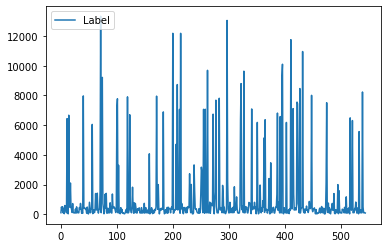

In [11]:
plt.plot(y_test, label = 'Label')
plt.legend(loc = 'upper left')
plt.show()

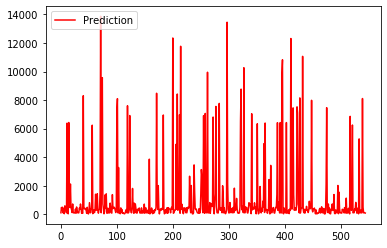

In [12]:
plt.plot(y_pred, label ='Prediction', color = 'red')
plt.legend(loc = 'upper left')
plt.show()

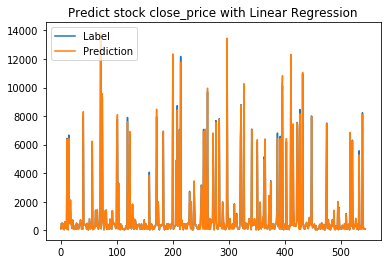

In [13]:
plt.plot(y_test, label = 'Label')
plt.plot(y_pred, label ='Prediction')
plt.legend(loc = 'upper left')
plt.title("Predict stock close_price with Random Forest Regression")

plt.show()